In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_excel("/mnt/c/Users/Charlotte/Nextcloud2/Uni/Masterarbeit/Fulltext screening/dataExtractionForm_v2.3_2025-10-29.xlsx", sheet_name="DEF")

df = df.transpose()

In [43]:
## Cleaning

# Get rid of row that contains notes
df = df.drop("Unnamed: 2")

# Make Questions column names
new_columns = df.iloc[0].astype(str) + ' ' + df.iloc[1].astype(str)
df = df.drop(df.index[[0, 1]]).reset_index(drop=True)
df.columns = new_columns

In [44]:
df_xai_applied = df[df["A.4 Do the authors apply a feature attribution method?"]== "yes"].reset_index(drop = True)

## PLOTS

In [62]:
import random

# Get the 'tab20' colormap
tab20_colors = plt.cm.tab20.colors



In [110]:
def create_frequency_bar_plot(df, column_to_plot):
    # Randomly select one color
    random_color = random.choice(tab20_colors)

    # Create plot values
    ax = df[column_to_plot].value_counts().plot.bar(color=random_color)

    # Add axis labels and title
    plt.xlabel("")
    plt.ylabel('Number of Papers')
    plt.title(column_to_plot)
    plt.xticks(rotation=45, ha='right')

    # Customize the axis lines
    ax.spines['top'].set_visible(False)    # Hide top spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    ax.spines['bottom'].set_color('lightgrey') # Set bottom (x-axis) to grey
    ax.spines['left'].set_visible(False)   # Hide left (y-axis)
    ax.tick_params(axis='x', colors='lightgrey')
    ax.tick_params(axis='y', colors='lightgrey')
    for label in ax.get_xticklabels():
        label.set_color('black')  # x-axis tick labels
    for label in ax.get_yticklabels():
        label.set_color('grey')  # x-axis tick labels

    # Add horizontal grid lines
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5, color='lightgrey')


    # Create plot file name from column name
    file_name = column_to_plot.replace(" ", "_")
    file_name = file_name.replace("?", "")

    # Save the plot as an image file
    timestamp = datetime.now().strftime("%Y-%m-%d-%H%M")
    plt.savefig("DEF_stats/" + file_name + timestamp + ".png", format='png', dpi=200, bbox_inches='tight')


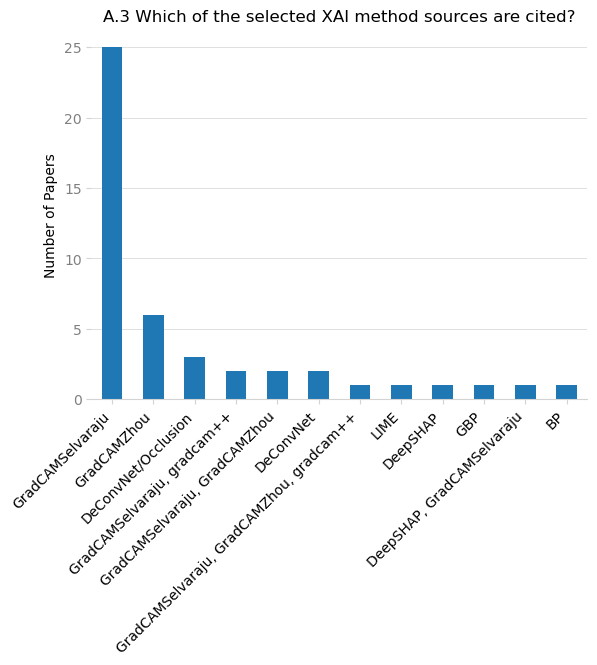

In [111]:
column_to_plot = "A.3 Which of the selected XAI method sources are cited?"

create_frequency_bar_plot(df_xai_applied, column_to_plot)

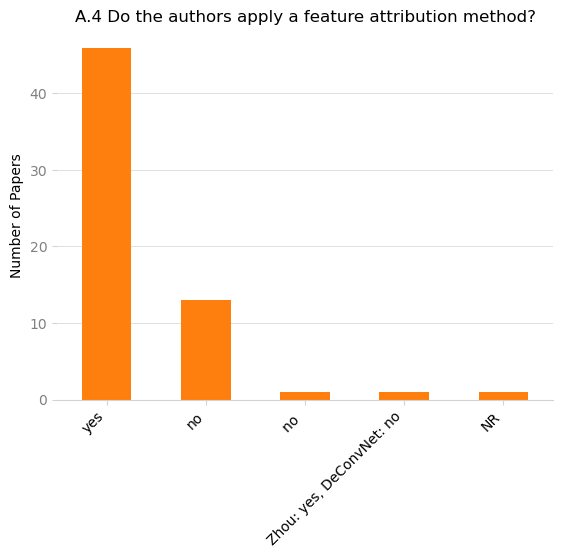

In [112]:
column_to_plot = "A.4 Do the authors apply a feature attribution method?"

create_frequency_bar_plot(df, column_to_plot)

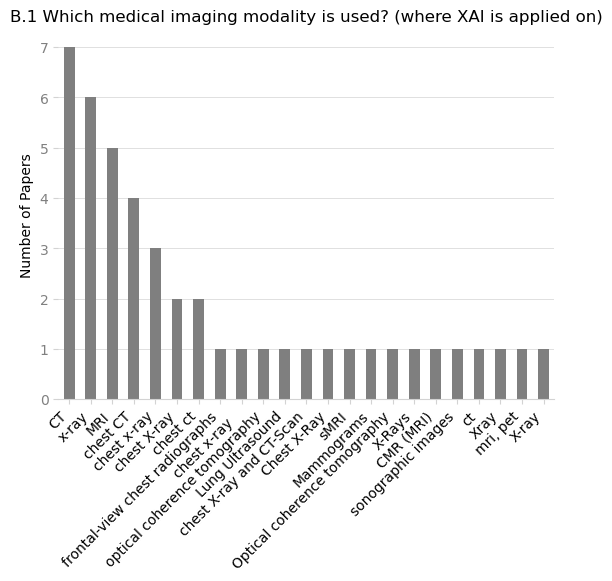

In [113]:
column_to_plot = "B.1 Which medical imaging modality is used? (where XAI is applied on)"

create_frequency_bar_plot(df_xai_applied, column_to_plot)

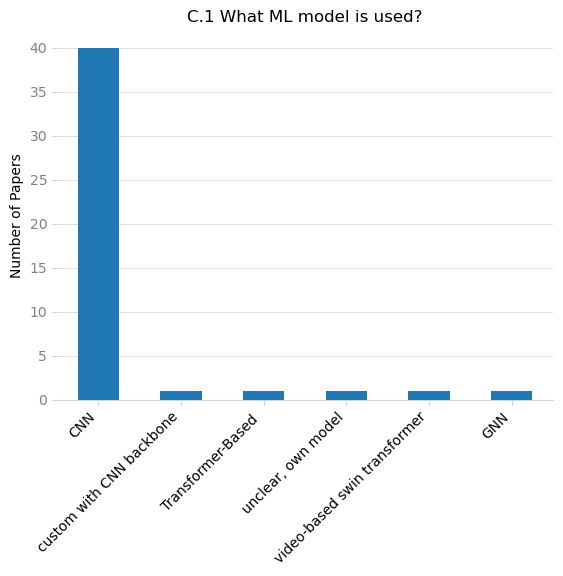

In [114]:
column_to_plot = "C.1 What ML model is used?"

create_frequency_bar_plot(df_xai_applied, column_to_plot)

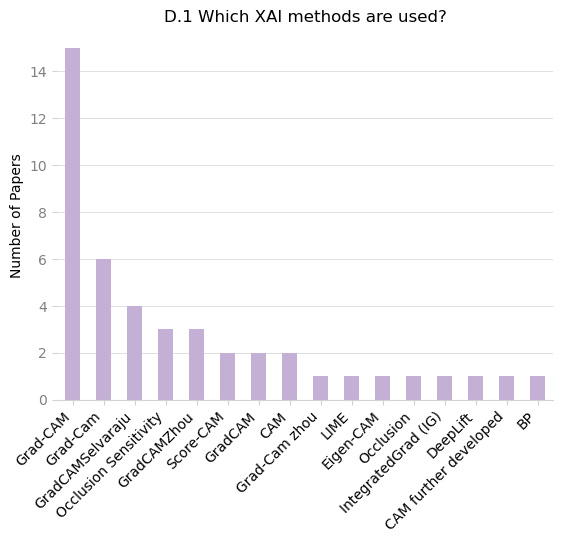

In [115]:
column_to_plot = "D.1 Which XAI methods are used?"

create_frequency_bar_plot(df_xai_applied, column_to_plot)


In [109]:
df_full_paper_list = pd.read_excel("/mnt/c/Users/Charlotte/Nextcloud2/Uni/Masterarbeit/Fulltext screening/dataExtractionForm_v2.3_2025-10-29.xlsx", sheet_name="Full cited-by list")

In [ ]:
# Papers to years

#  PLOT Map paper to their years

# PLOT Map paper to their citation numbers